In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Problem 2a Rejection Sampling

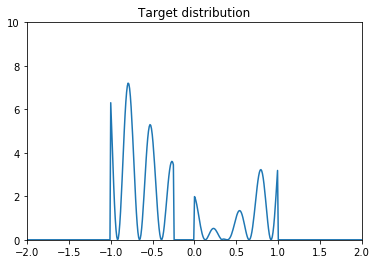

In [2]:
x = np.linspace(-2, 2.5, 500)
def target(lst):
    y = []
    for x in lst:
        if (x>=-1 and x<=-0.25) or (x>=0 and x<=1):
            y.append(((np.cos(12*x))**2) * abs((x**3)+(6*x)-2))
        else:
            y.append(0)
    return y
plt.plot(x, target(x))
plt.title('Target distribution')
plt.axis([-2,2,0,10])
plt.show()

A uniform proposal distribution q that covers the support of f is Uniform(-1, 1), meaning $q(x) = \frac{1}{2} \ \forall x\in[-1,1]$.

$g(x)$ is allways smaller than 8 as seen from the graph above. To make it smaller than $q(x) = 1/2$, we need to scale the target density by a factor $M \leq \frac{1}{2}\cdot\frac{1}{8} = 1/16$. 

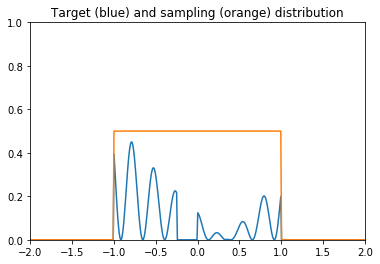

In [3]:
x = np.linspace(-2, 2.5, 500)
scaled_target = [(1/16)*i for i in target(x)]
plt.plot(x, scaled_target)
plt.plot(x, stats.uniform.pdf(x, -1, 2))
plt.axis([-2,2,0,1])
plt.title('Target (blue) and sampling (orange) distribution')
plt.show()

Problem 2b

The acceptance probability, $\frac{n}{N}$,  is exactly equal to the area under the target distribution, $M \cdot g(x)$,

so $\frac{n}{N} = \int M \cdot g(x)$ --> $\frac{n}{N} = M \int g(x)$ since M is a constant
        
   $\frac{n}{N \cdot M} = \int g(x)$ , multiplying both sides by the normalization constant we get:
   
   $c \cdot \frac{n}{N \cdot M} = c \cdot \int g(x)$ , and since we want $c \cdot \int g(x)$ to be equal to 1 (because we want it to be normalized), we set $c \cdot \int g(x) = 1$ to find the value of c
   
   $c \cdot \frac{n}{N \cdot M} = 1$
   
   c is thus equal to:
   
   $c = \frac{N \cdot M}{n}$


Problem 2c

Num accepted samples:  1001
Total samples:  5016


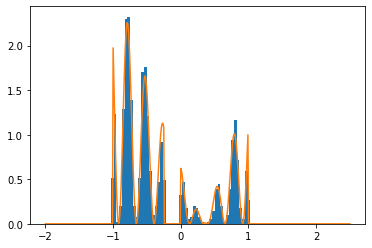

In [18]:
def rejection_sample_uniform(num_samples):
    proposals = stats.uniform.rvs(loc=-1, scale=2, size=num_samples)
    scaled_tar = [(1/16)*i for i in target(proposals)]
    ratio = (scaled_tar)/stats.uniform.pdf(proposals, loc=-1, scale=2)
    for x in ratio:
        assert(x <= 1)
    #print('Max accept prob: %.3f' % np.max(ratio))
    accept = ratio > stats.uniform.rvs(loc=0, scale=1, size=num_samples)
    num_accept = np.sum(accept)
    #print('Accepted %d out of %d proposals' % (num_accept, num_samples))
    return proposals[accept], num_accept
N = 0
for i in range(5000, 5400):
    samples = rejection_sample_uniform(num_samples=i)
    if samples[1] >= 1000:   
        N = i
        break
print("Num accepted samples: ", samples[1])
print("Total samples: ", N)
M = 1/16
n = samples[1]
c = (N*M)/n

plt.hist(samples[0], bins=np.linspace(-2, 2, 100), density=True)
scaled_target = [c*i for i in target(x)]
plt.plot(x, scaled_target)
plt.show()

Num accepted samples:  1000925
Total num samples:  5330007
0.33281758123735544


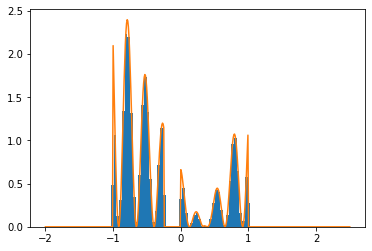

In [19]:
N = 0
for i in range(5330000, 5400000):
    samples = rejection_sample_uniform(num_samples=i)
    if samples[1] >= 1000000:   
        N = i
        break
        
print("Num accepted samples: ", samples[1])
print("Total num samples: ", N)
M = 1/16
n = samples[1]
c = (N*M)/n
print(c)
plt.hist(samples[0], bins=np.linspace(-2, 2, 100), density=True)
scaled_target = [c*i for i in target(x)]
plt.plot(x, scaled_target)
plt.show()